In [1]:
#%% Import libraries
import argparse
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import scipy.io
import scipy.misc
import numpy as np
import pandas as pd
import PIL
import tensorflow as tf
from keras import backend as K
from keras.layers import Input, Lambda, Conv2D
from keras.models import load_model, Model
from yolo_utils import read_classes, read_anchors, generate_colors, preprocess_image, draw_boxes, scale_boxes
from yad2k.models.keras_yolo import yolo_head, yolo_boxes_to_corners, preprocess_true_boxes, yolo_loss, yolo_body

from yolo_v1_utilities import * # helper functions
import imageio # for plot (reading and writing) image data
import glob # serach under a foler
import cv2
print ('tf:', tf.__version__)
import keras
print ('keras:', keras.__version__)

tf: 1.15.0
keras: 2.3.1


Using TensorFlow backend.


In [2]:
#%% load pre-trained YOLOv1 model on images  
sess = K.get_session()
class_names = read_classes("model_data/coco_classes.txt")
anchors = read_anchors("model_data/yolo_anchors.txt")
# Loading a pre-trained model
yolo_model = load_model("model_data/yolo.h5")
# yolo_model.summary()

# Convert output of the model to usable bounding box tensors
yolo_outputs = yolo_head(yolo_model.output, anchors, len(class_names))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.




C:\ProgramData\Anaconda3\envs\tf1.15\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [4]:
#%% Test pre-trained YOLO model on an image
image_shape = (544., 960.) # It will be automated recognized in the following batch process
scores, boxes, classes = yolo_eval(yolo_outputs, image_shape)
yolo_out = (scores, boxes, classes) # tf variable, it will be executed in sess

folderin = 'frames'
folderout = 'out'
out_scores, out_boxes, out_classes, _ = predict(sess, yolo_model, folderin, "frame4.jpg",
                                                 folderout, yolo_out, class_names, plt = True)

Found 10 boxes for frame4.jpg
car 0.51 (55, 211) (317, 382)
car 0.55 (2, 288) (41, 314)
traffic light 0.62 (752, 226) (779, 271)
car 0.65 (316, 277) (418, 363)
car 0.68 (394, 237) (678, 498)
car 0.68 (834, 312) (915, 342)
traffic light 0.69 (347, 139) (368, 182)
traffic light 0.70 (500, 139) (523, 181)
traffic light 0.75 (433, 139) (457, 185)
car 0.77 (672, 304) (756, 332)


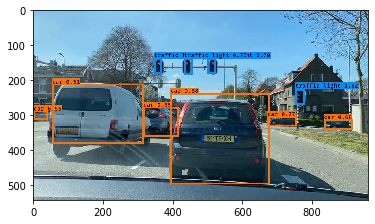

In [5]:
output_image = imageio.imread(os.path.join(folderout, "frame4.jpg"))
imshow(output_image)

In [ ]:
#%% batch process has been executed already and images saved.
# folderin = 'frames'

# # read image size e.g., image_shape = (720., 1280.) 
# paths = glob.glob(os.path.join(folderin, '*.jpg'))
# img = cv2.imread(paths[0])
# height, width, layers = img.shape
# image_shape = (float(height), float(width))

# scores, boxes, classes = yolo_eval(yolo_outputs, image_shape)
# yolo_out = (scores, boxes, classes) # tf variable, it will be executed in sess

# folderout = 'out' # <<<<<<<<<<<<<<<
# paths = glob.glob(os.path.join(folderin, '*.jpg'))
# paths.sort()
# for path in paths:
#     # print(path)
#     temp = folderin+'\\'
#     image_C  = path.replace(temp, "")
#     print(image_C)
#     out_scores, out_boxes, out_classes, _ = predict(sess, yolo_model, folderin, image_C,
#                                                 folderout, yolo_out, class_names, plt = False)
    

All processed images have been saved in the 'folderout'. Now run the code to convert all images to a video.

In [6]:
#%% convert images (Frames) to Video
import cv2
import numpy as np
import os
from os.path import isfile, join

pathIn= './out/' # do not miss the last '/'! 
pathOut = 'nijmegen3_10x.mp4' # .mp4, or .avi etc.

fps = 10 # how many frames in one sec

frame_array = []
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
#for sorting the file names properly
files.sort(key = lambda x: int(x[5:-4])) #given name format: frame23.jpg
# files.sort()

for i in range(len(files)):
    filename= pathIn + files[i]
    print ('processing... ' + filename)
    #reading each files
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    
    #inserting the frames into an image array
    frame_array.append(img)
    
out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
for i in range(len(frame_array)):
    # writing to a image array
    out.write(frame_array[i])
    
out.release()

processing... ./out/frame1.jpg
processing... ./out/frame2.jpg
processing... ./out/frame3.jpg
processing... ./out/frame4.jpg
processing... ./out/frame5.jpg
processing... ./out/frame6.jpg
processing... ./out/frame7.jpg
processing... ./out/frame8.jpg
processing... ./out/frame9.jpg
processing... ./out/frame10.jpg
processing... ./out/frame11.jpg
processing... ./out/frame12.jpg
processing... ./out/frame13.jpg
processing... ./out/frame14.jpg
processing... ./out/frame15.jpg
processing... ./out/frame16.jpg
processing... ./out/frame17.jpg
processing... ./out/frame18.jpg
processing... ./out/frame19.jpg
processing... ./out/frame20.jpg
processing... ./out/frame21.jpg
processing... ./out/frame22.jpg
processing... ./out/frame23.jpg
processing... ./out/frame24.jpg
processing... ./out/frame25.jpg
processing... ./out/frame26.jpg
processing... ./out/frame27.jpg
processing... ./out/frame28.jpg
processing... ./out/frame29.jpg
processing... ./out/frame30.jpg
processing... ./out/frame31.jpg
processing... ./o

If you were to run this session over all your images. Here's a MP4 video you would get:

<center>
<video width="400" height="300" src="nijmegen3_1x.mp4" type="video/mp4" controls>
</video>
</center>